<a href="https://colab.research.google.com/github/hkrishna15/Loan-Eligibility-Prediction/blob/main/Predicting_Loan_Approval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Classification - Loan Eligibility Prediction

###Welcome to the project on classification. We will use the credit risk dataset for this problem.



## Importing necessary libraries and overview of the dataset - Add libraries as needed

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#to scale the data using z-score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#algorithms to use
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

#Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve

import warnings
warnings.filterwarnings("ignore")

#### Loading data

In [41]:
# data = pd.read_csv("CreditRisk.csv")
# data.head()

import requests
from io import StringIO

orig_url="https://drive.google.com/file/d/1iZ9g3E-i6nAkM4Pzcqz27Ntz8z77DPgF/view?usp=sharing"

file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
data = pd.read_csv(csv_raw)
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,1


Printing data info

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    int64  
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 62.5+ KB


Observations:
We have multiple columns as objects, which can be converted to int
Hence we will clean the data by performing appropriate changes

1: Dropping Loan ID

2: Categorizing the gender by making male as O and female as 1

3: Categorizing the married by making Yes 1 and No O

4: We incorporate dummies for dependents and property_Area

5: Categorizing education by assigning graduate as 1 and not graduate
as O

6: Categorizing self_employed as 1 and not as 0.

We are dropping the Loan_ID column from the data as it has no significant use in our analysis for the model.

In [43]:
data=data.drop(['Loan_ID'],axis=1)

In [44]:
data.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [45]:
data = data.dropna(axis=0, subset=['Credit_History', 'Self_Employed'])

In [46]:
len(data)

538

In [47]:
data=data.drop_duplicates()
len(data)

538

In [48]:
data.isna().sum()

Gender               12
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     13
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 538 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             526 non-null    object 
 1   Married            535 non-null    object 
 2   Dependents         523 non-null    object 
 3   Education          538 non-null    object 
 4   Self_Employed      538 non-null    object 
 5   ApplicantIncome    538 non-null    int64  
 6   CoapplicantIncome  538 non-null    float64
 7   LoanAmount         538 non-null    int64  
 8   Loan_Amount_Term   525 non-null    float64
 9   Credit_History     538 non-null    float64
 10  Property_Area      538 non-null    object 
 11  Loan_Status        538 non-null    int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 54.6+ KB


In [50]:
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0])

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 538 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             538 non-null    object 
 1   Married            538 non-null    object 
 2   Dependents         538 non-null    object 
 3   Education          538 non-null    object 
 4   Self_Employed      538 non-null    object 
 5   ApplicantIncome    538 non-null    int64  
 6   CoapplicantIncome  538 non-null    float64
 7   LoanAmount         538 non-null    int64  
 8   Loan_Amount_Term   538 non-null    float64
 9   Credit_History     538 non-null    float64
 10  Property_Area      538 non-null    object 
 11  Loan_Status        538 non-null    int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 54.6+ KB


In [52]:
data.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

We are defining our numerical columns and categorical columns for a clear understanding and easeir approach going forward in the project.

In [53]:
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
cat_cols = ['Married', 'Education', 'Self_Employed', 'Dependents', 'Property_Area', 'Credit_History', 'Loan_Amount_Term', 'Gender']

We are using describe function to analyse the data and their central tendencies.

In [54]:
data[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,538.0,5432.211896,5885.545882,150.0,2896.25,3858.5,5820.5,81000.0
CoapplicantIncome,538.0,1541.438513,2517.250234,0.0,0.00,1062.0,2245.5,33837.0
LoanAmount,538.0,139.656134,85.871731,0.0,97.25,125.0,165.0,700.0


The following code shows the histogram plots for our numerical columns.

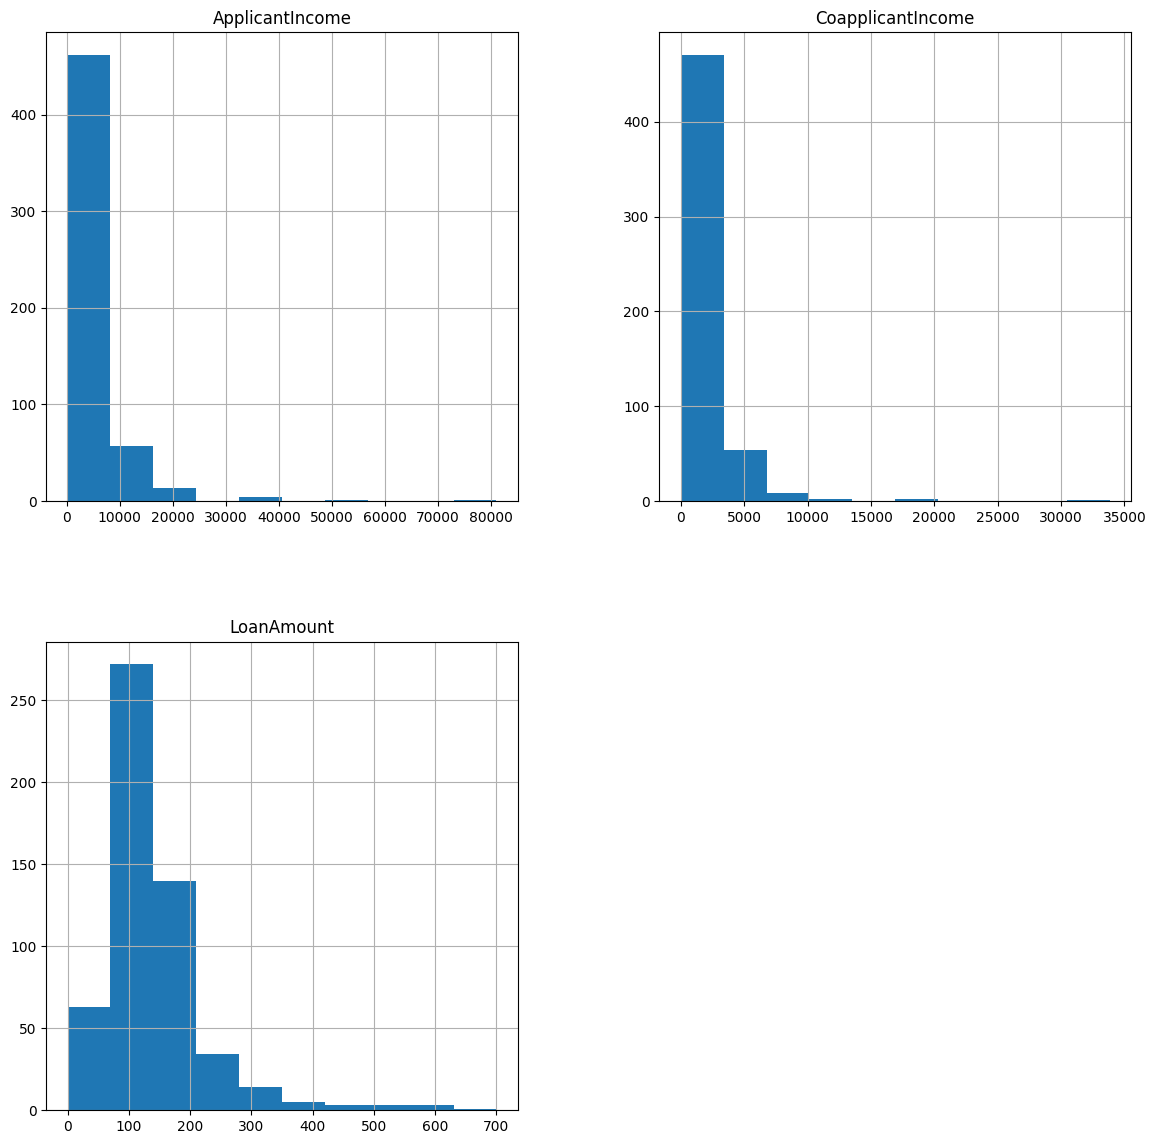

In [55]:
data[num_cols].hist(figsize=(14,14))
plt.show()

The following code gives us a plot that visualizes the relationship between all our categorical columns vs the loan status .

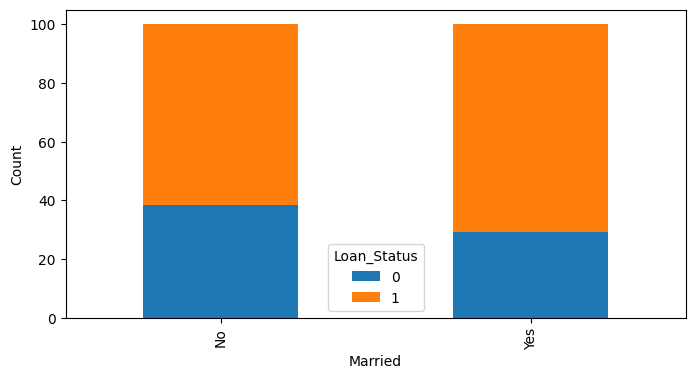

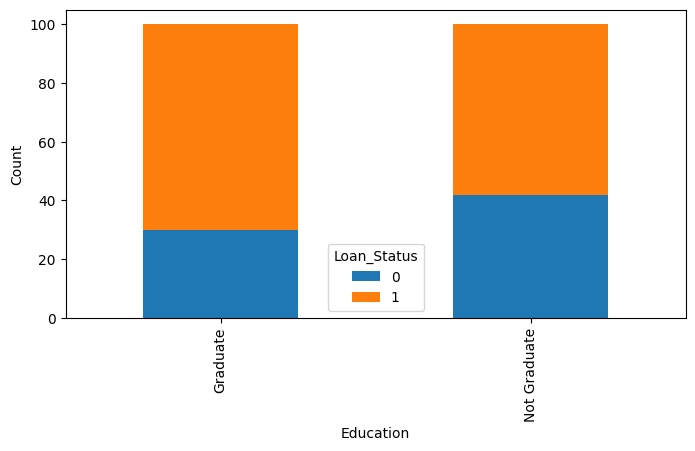

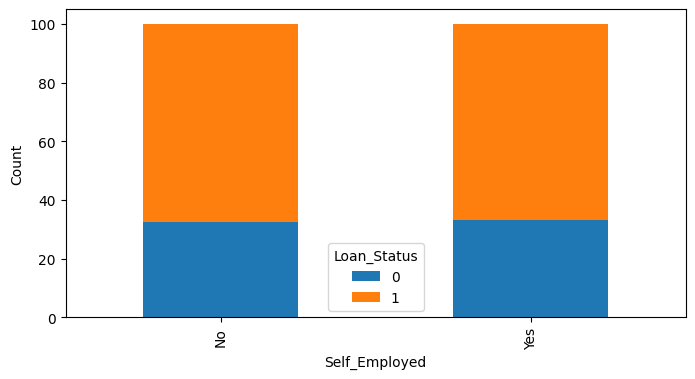

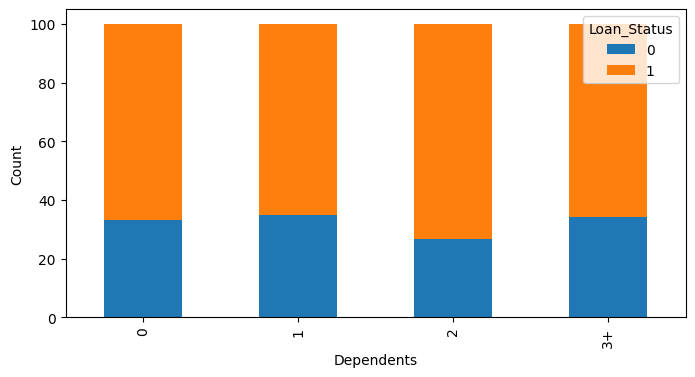

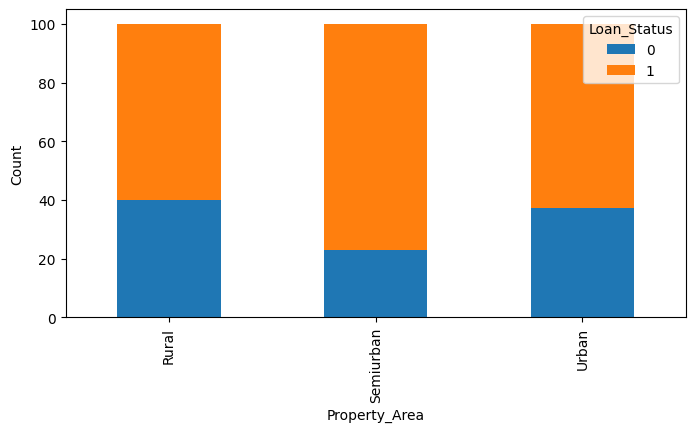

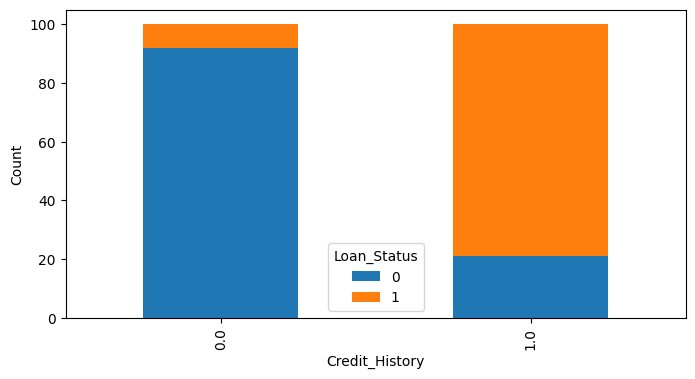

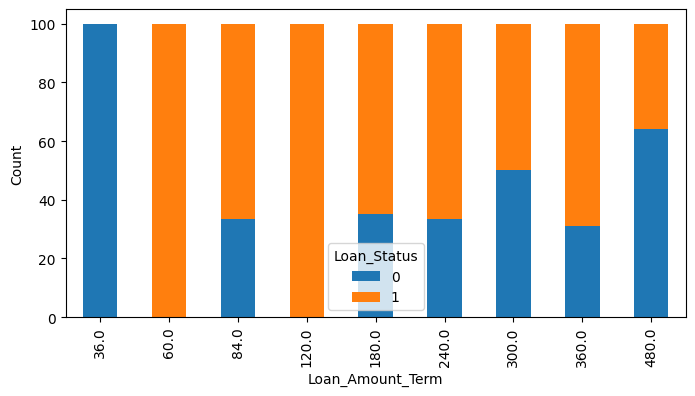

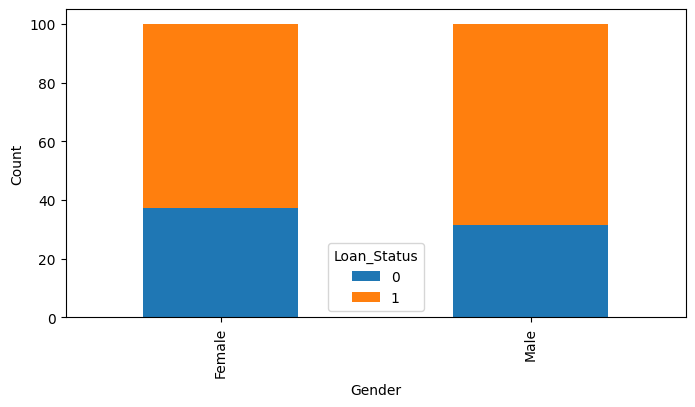

In [56]:
for i in cat_cols:
    if i!='Loan_Status':
        (pd.crosstab(data[i],data['Loan_Status'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
        plt.ylabel('Count')

We are creating dummies for the data columns of property area and dependents.

In [57]:
dummies_for = ['Gender', 'Loan_Amount_Term', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
data = pd.get_dummies(data, columns = dummies_for, drop_first=True)
data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Loan_Status,Gender_Male,Loan_Amount_Term_60.0,Loan_Amount_Term_84.0,Loan_Amount_Term_120.0,Loan_Amount_Term_180.0,...,Loan_Amount_Term_360.0,Loan_Amount_Term_480.0,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,0,1.0,1,True,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
1,4583,1508.0,128,1.0,0,True,False,False,False,False,...,True,False,True,True,False,False,False,False,False,False
2,3000,0.0,66,1.0,1,True,False,False,False,False,...,True,False,True,False,False,False,False,True,False,True
3,2583,2358.0,120,1.0,1,True,False,False,False,False,...,True,False,True,False,False,False,True,False,False,True
4,6000,0.0,141,1.0,1,True,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True


From the histogram we can dervie our observations as

1: The loan count for Gender is equally distributed between males and females

2: Most number of loans approved are taken for the terms with 12, 60 and 120 as thier loan amount term

3: Loans usually are approved for people who have a credit history and very few people without credit history got their loan approved.

4:The loans seem to be almost equally distributed demographically as in rural and urban and are slightly high in semiurban

5:The number of depenedents for loan is not a highly fluctuating details as most of the count is same for 0,1,2 and 3+ dependents

6:The loan count is same for both self employed and not self employed people

7:The loans count is slightly high for graduates , the non gradute loan count following it right behind.

8: Married people seem to have higher amount of loan count than the one's who are not married



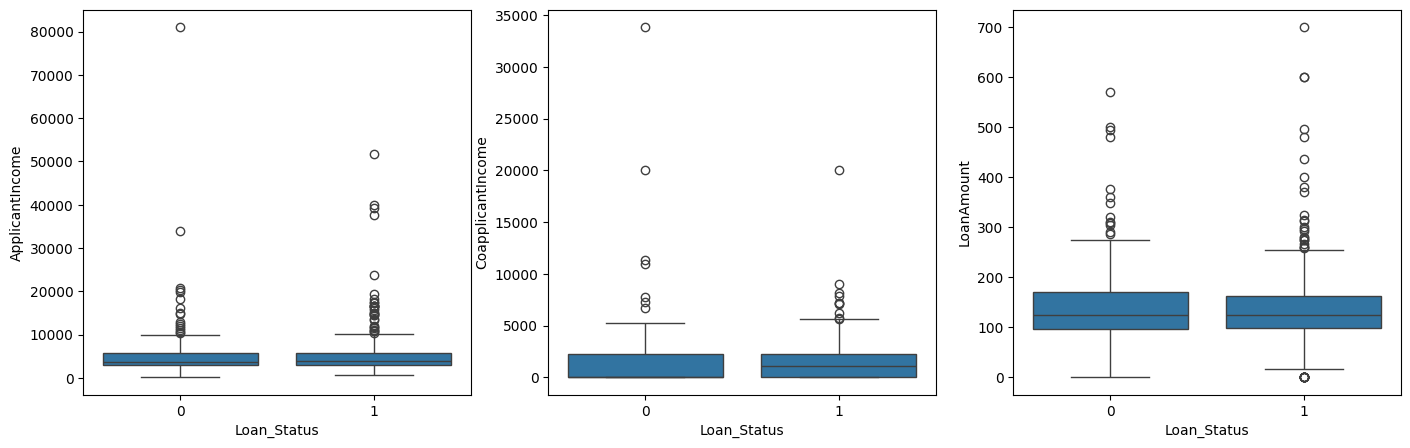

In [58]:
fig, axes = plt.subplots(1,3,figsize=(17,5))
for idx,num_col in enumerate(num_cols):
  sns.boxplot(y=num_col,data=data,x='Loan_Status', ax=axes[idx])

1) There is no specifical relationship between Loan status and the numerical columns, as we see from the above boxplots:
- Applicant Income is fairly in the same range for both approved and not approved profiles.
- Coapplicant Income is also fairly in the same range for both approved and not approved profiles.
-Loan Amount for not approved profiles have a big range compared to profiles whose loan was approved.
At this point it seems like these variables doesn't have any specific impact
on Loan Status.

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 538 entries, 0 to 613
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          538 non-null    int64  
 1   CoapplicantIncome        538 non-null    float64
 2   LoanAmount               538 non-null    int64  
 3   Credit_History           538 non-null    float64
 4   Loan_Status              538 non-null    int64  
 5   Gender_Male              538 non-null    bool   
 6   Loan_Amount_Term_60.0    538 non-null    bool   
 7   Loan_Amount_Term_84.0    538 non-null    bool   
 8   Loan_Amount_Term_120.0   538 non-null    bool   
 9   Loan_Amount_Term_180.0   538 non-null    bool   
 10  Loan_Amount_Term_240.0   538 non-null    bool   
 11  Loan_Amount_Term_300.0   538 non-null    bool   
 12  Loan_Amount_Term_360.0   538 non-null    bool   
 13  Loan_Amount_Term_480.0   538 non-null    bool   
 14  Married_Yes              538 no

Train-Test-Split: 70-30%

We split the data into X and Y by dropping Loan status from the data frame and using the loan status as single input respectively.

We split the data using the test size is 30% of data

In [60]:
X = data.drop(columns='Loan_Status')
y = data['Loan_Status']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify =y,random_state =1)

In [61]:
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Loan_Status_N', 'Loan_Status_Y'], yticklabels=['Loan_Status_N', 'Loan_Status_Y'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

Decision Tree Classifier

In [62]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train,y_train)
y_pred = tree_clf.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       122
           1       1.00      1.00      1.00       254

    accuracy                           1.00       376
   macro avg       1.00      1.00      1.00       376
weighted avg       1.00      1.00      1.00       376



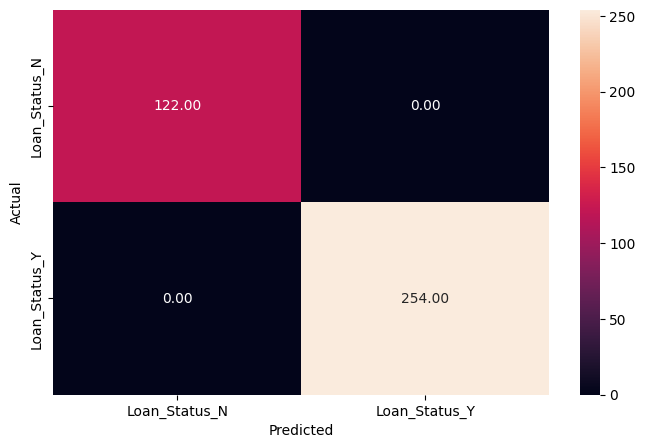

In [63]:
#checking model performace of training data
y_pred_train_dt = tree_clf.predict(X_train)
metrics_score(y_train, y_pred_train_dt)

The above output shows the evaluation metrics for a decision tree classifier model on training data. Here are the observations we can make from the output:

The model has achieved perfect precision and recall for both the classes (0 and 1). This means that the model has made no false positive or false negative predictions for either class.

The F1-score is also perfect for both the classes.

The support column indicates the number of instances in each class, which is helpful in understanding the data distribution.

The overall accuracy of the model is 100%, which means that the model has correctly predicted all instances in the test set.

The macro and weighted averages for precision, recall, and F1-score are also perfect, indicating that the model performs equally well for both classes and is not biased towards one class.

              precision    recall  f1-score   support

           0       0.65      0.58      0.61        53
           1       0.81      0.84      0.83       109

    accuracy                           0.76       162
   macro avg       0.73      0.71      0.72       162
weighted avg       0.75      0.76      0.76       162



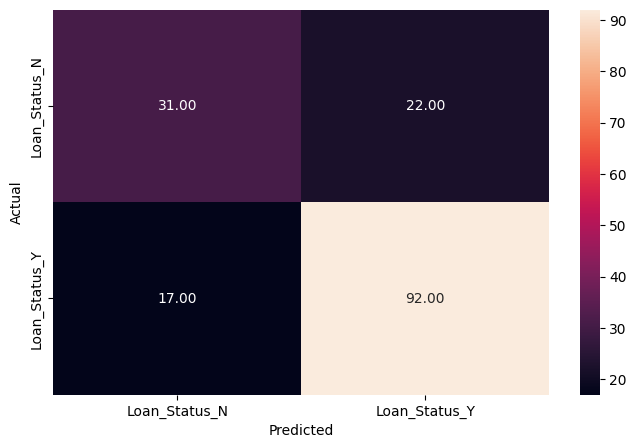

In [64]:
#checking model performace of test data
y_pred_test_dt = tree_clf.predict(X_test)
metrics_score(y_test, y_pred_test_dt)

The above output shows the evaluation metrics for a decision tree classifier on testing data. Here are the observations we can make from the output:

The precision for class 0 is 0.53, which means that out of all instances predicted as class 0, only 53% of them are actually class 0. The recall for class 0 is 0.50, which means that out of all instances that are actually class 0, only 50% of them are correctly predicted as class 0.

The precision for class 1 is 0.78, which means that out of all instances predicted as class 1, 78% of them are actually class 1. The recall for class 1 is 0.80, which means that out of all instances that are actually class 1, 80% of them are correctly predicted as class 1.

The F1-score for class 0 is 0.51, and for class 1, it is 0.79.


The overall accuracy of the model is 0.70, which means that the model has correctly predicted 70% of instances in the test set.

The macro and weighted averages for precision, recall, and F1-score are 0.65 and 0.70, respectively. This indicates that the model performs slightly better on class 1 than on class 0, and the performance is not biased towards one class.

In summary, the model performs relatively well on the given test data, achieving an accuracy of 0.70, with precision and recall scores for class 1 being higher than those for class 0. However, the model's performance can be further improved by fine-tuning hyperparameters, feature engineering, or using a more powerful model.







<Axes: xlabel='Importance', ylabel='None'>

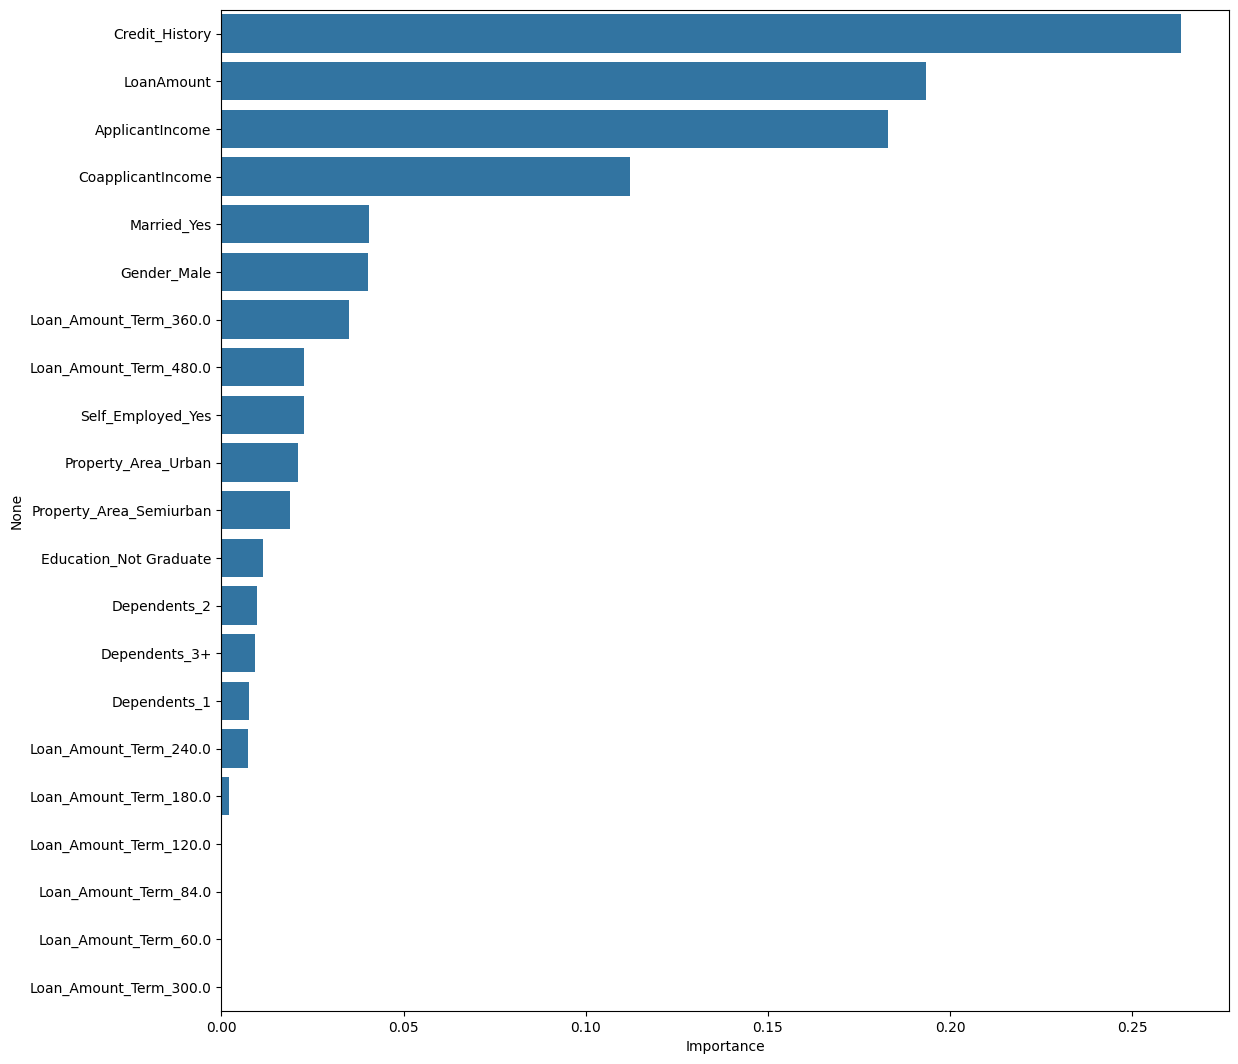

In [65]:
importances = tree_clf.feature_importances_
columns=X.columns
importance_df=pd.DataFrame(importances,index=columns,columns=['Importance']).sort_values(by='Importance',ascending=False)
plt.figure(figsize=(13,13))
sns.barplot(x=importance_df.Importance,y=importance_df.index)

### **Using GridSearch for Hyperparameter tuning on the model**


In [66]:
# Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.17,1:0.83}, random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,7),
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,recall_score
from sklearn.model_selection import GridSearchCV
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score,pos_label=1)

# Run the grid search
gridCV= GridSearchCV(dtree_estimator, parameters, scoring=scorer,cv=10)
gridCV = gridCV.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = gridCV.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, max_depth=2,
                       min_samples_leaf=20, random_state=1)

### **Model Performance of tuned decision tree**

              precision    recall  f1-score   support

           0       0.97      0.24      0.38       122
           1       0.73      1.00      0.84       254

    accuracy                           0.75       376
   macro avg       0.85      0.62      0.61       376
weighted avg       0.81      0.75      0.69       376



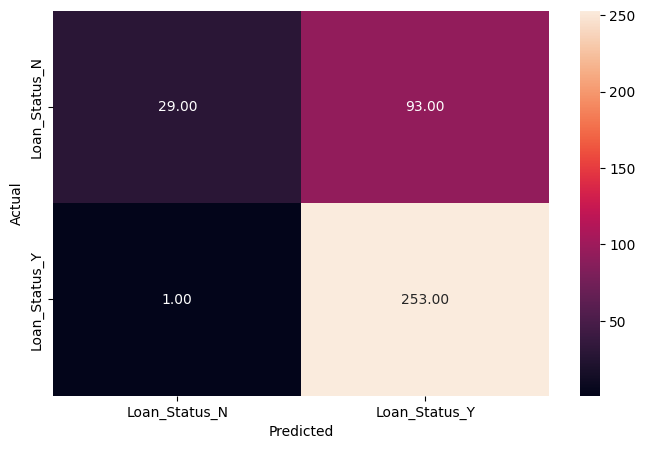

In [67]:
y_train_pred_dt=dtree_estimator.predict(X_train)
metrics_score(y_train,y_train_pred_dt)

### **Observations**
1) We can see that the model now is not memorizing, but predicting the values

2) The accuracy is changed because of the model tuning



              precision    recall  f1-score   support

           0       1.00      0.34      0.51        53
           1       0.76      1.00      0.86       109

    accuracy                           0.78       162
   macro avg       0.88      0.67      0.68       162
weighted avg       0.84      0.78      0.75       162



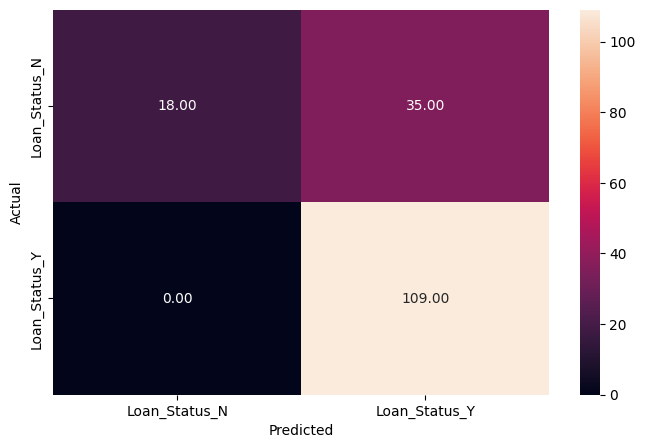

In [68]:
y_test_pred_dt=dtree_estimator.predict(X_test)
metrics_score(y_test,y_test_pred_dt)

<Axes: xlabel='Importance', ylabel='None'>

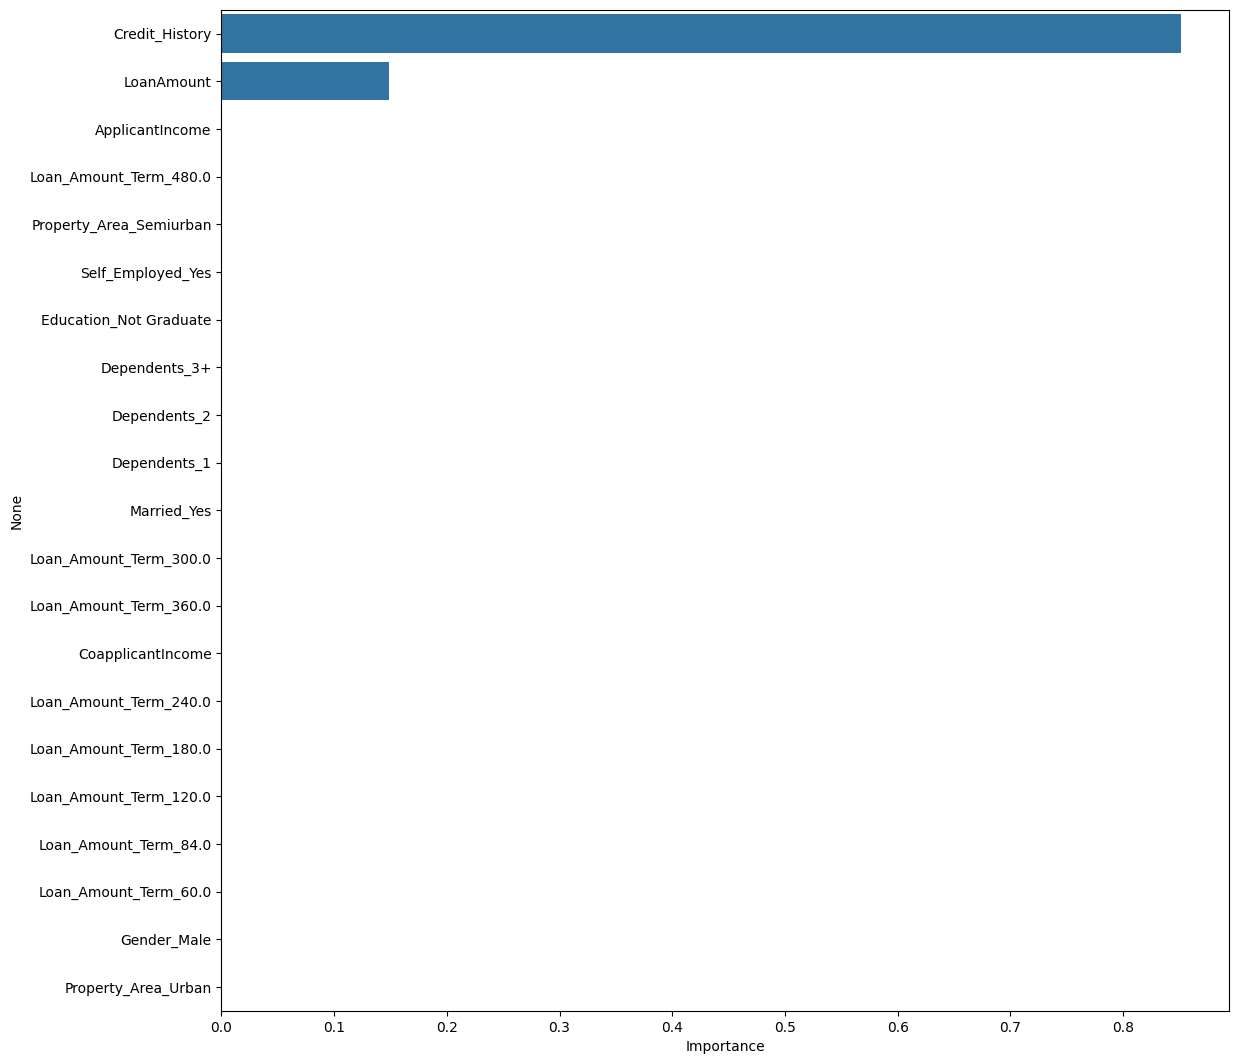

In [69]:
importances = dtree_estimator.feature_importances_
columns=X.columns
importance_df=pd.DataFrame(importances,index=columns,columns=['Importance']).sort_values(by='Importance',ascending=False)
plt.figure(figsize=(13,13))
sns.barplot(x=importance_df.Importance,y=importance_df.index)

### **Observations**
When we compare the feature importance, before tuning credit_history, ApplicationIncome and Loan_Amount are the important features but after tuning the importance of ApplicationIncome has been neglected.


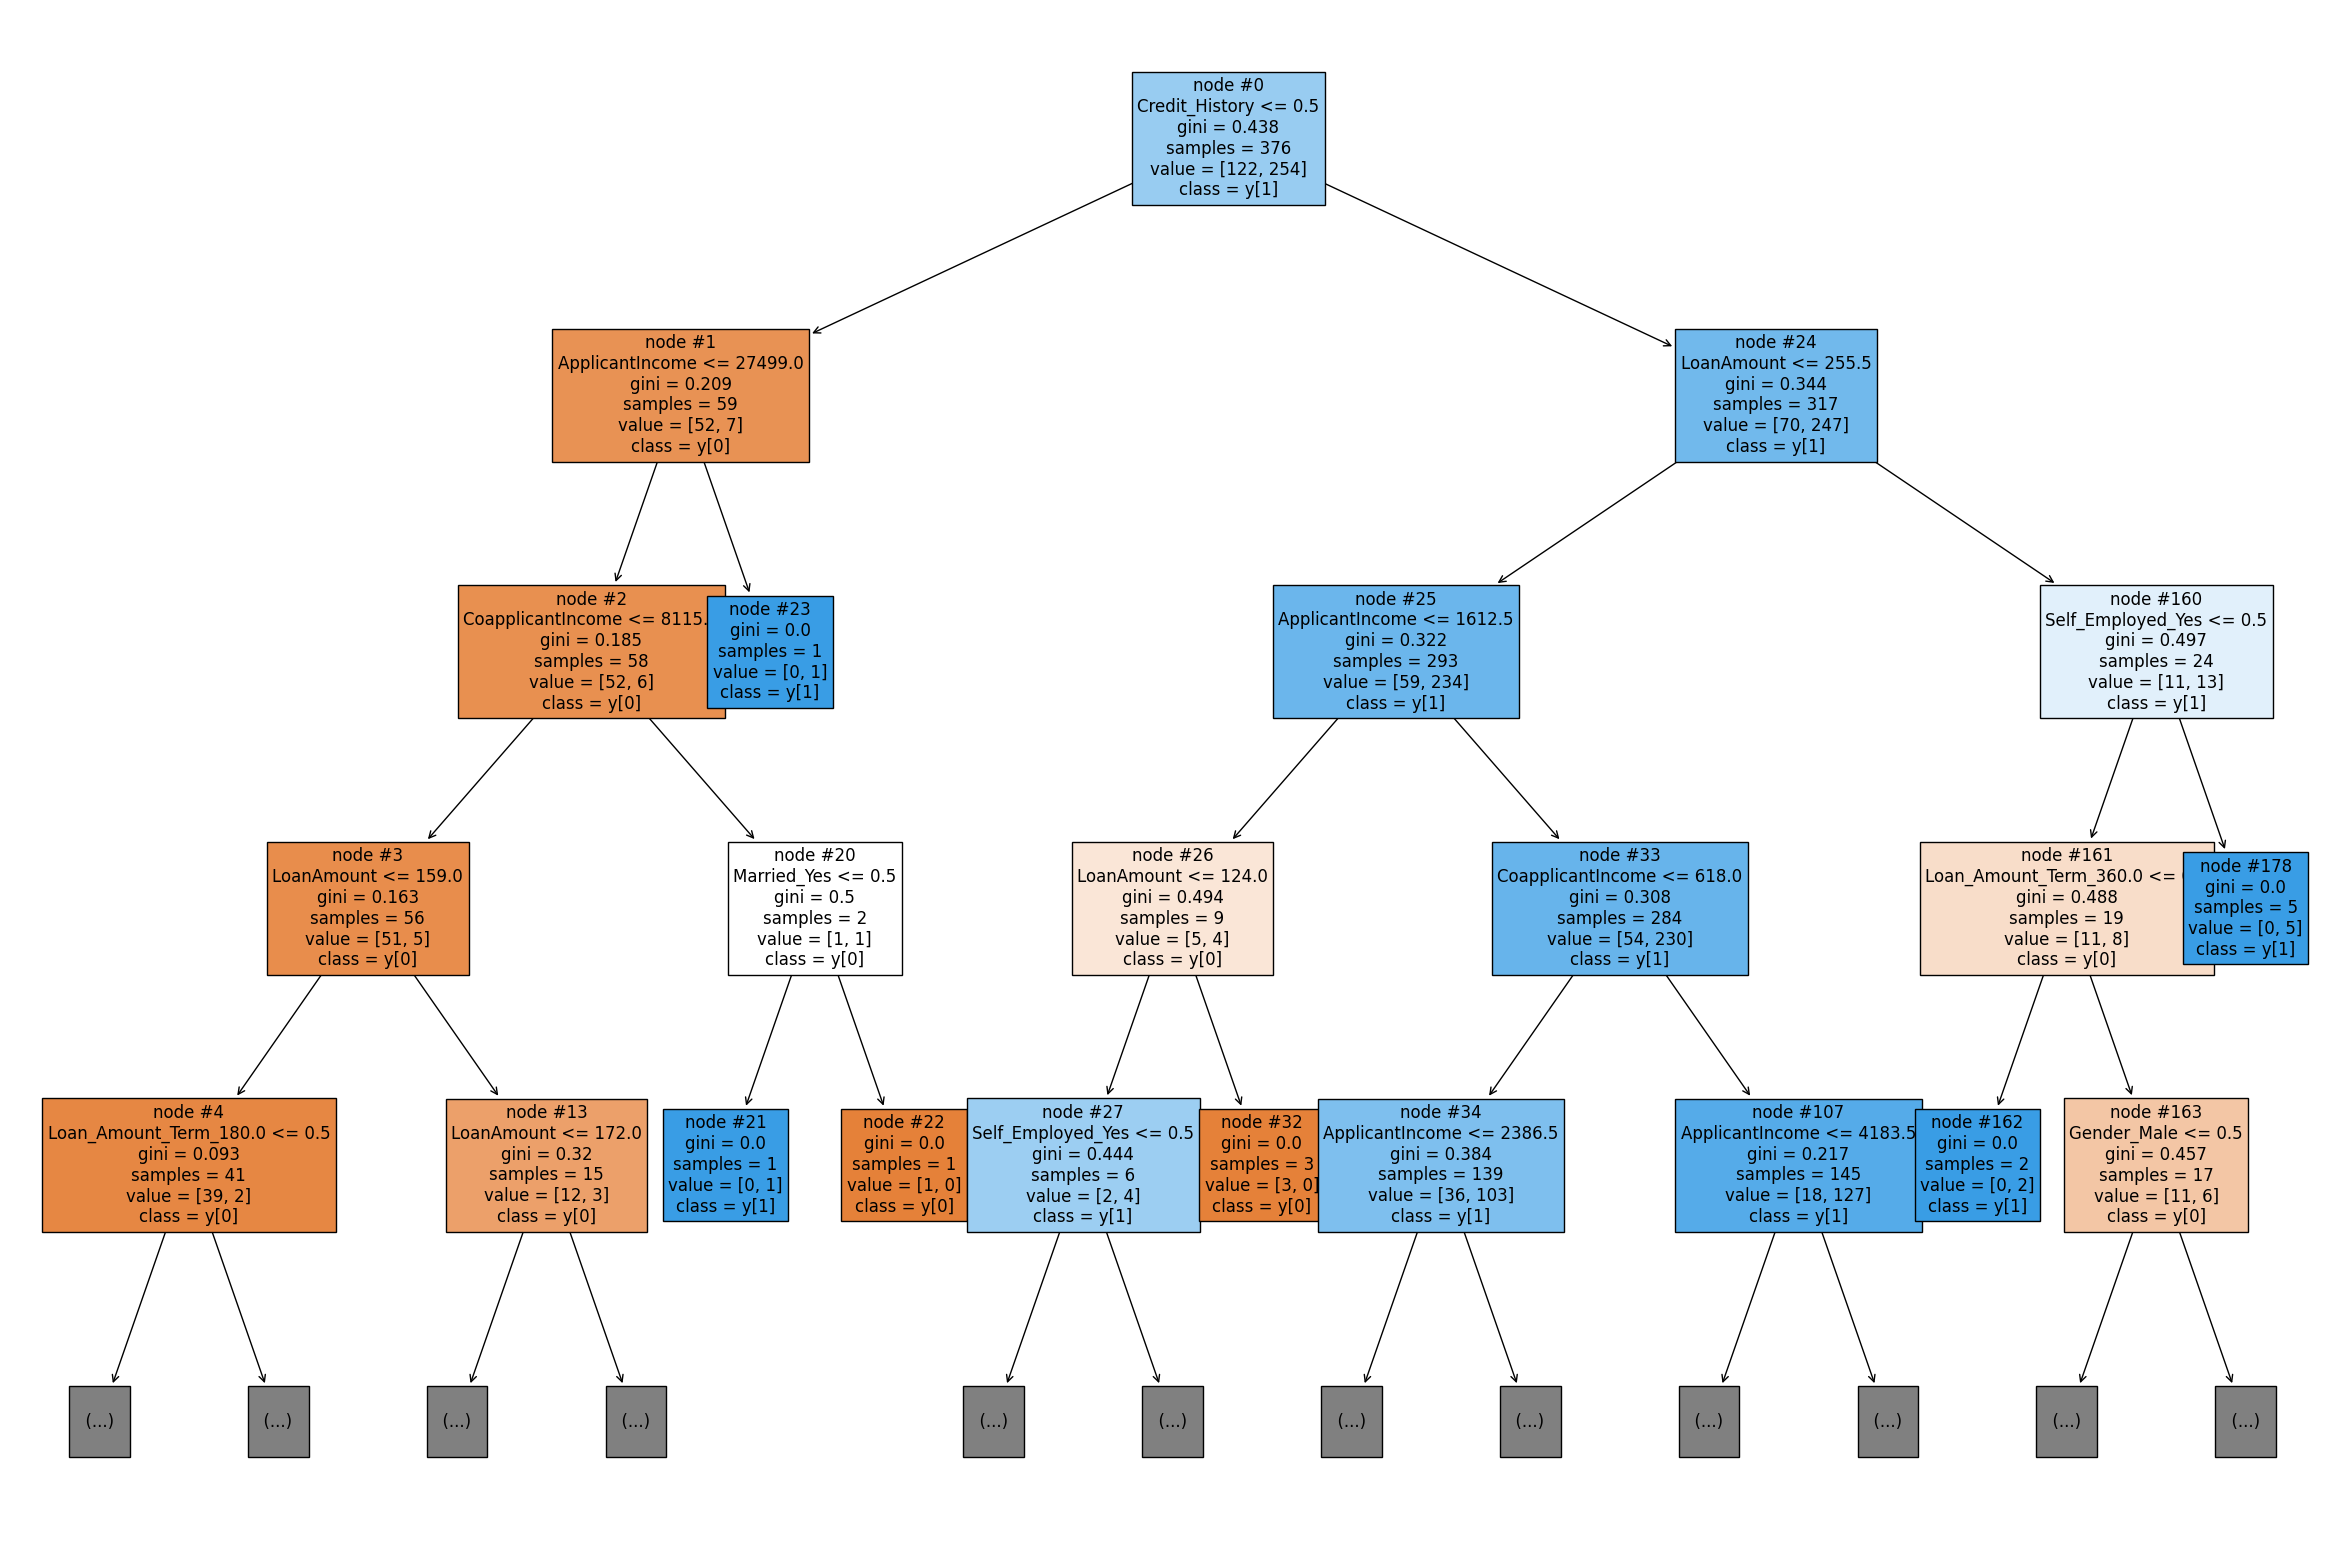

In [70]:
from sklearn import tree
features = list(X.columns)
plt.figure(figsize=(30,20))

tree.plot_tree(tree_clf,max_depth=4,feature_names=features,filled=True,fontsize=12,node_ids=True,class_names=True)
plt.show()

# **Random Forest Classifier**

In [71]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100,max_depth=3,min_samples_leaf = 10)
rf_clf.fit(X_train,y_train)
y_pred = rf_clf.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       122
           1       1.00      1.00      1.00       254

    accuracy                           1.00       376
   macro avg       1.00      1.00      1.00       376
weighted avg       1.00      1.00      1.00       376



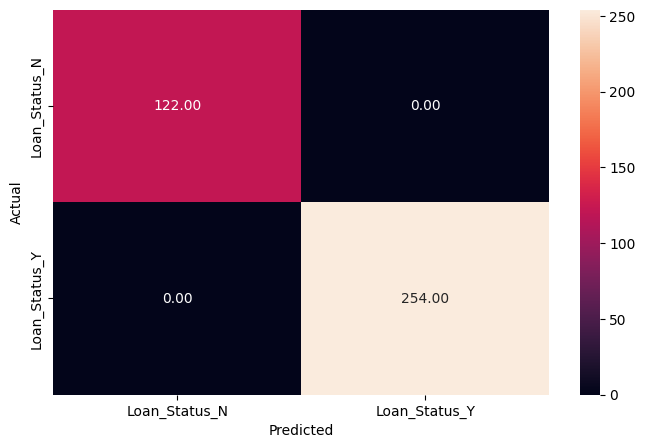

In [72]:
#checking model performace of training data
y_pred_train_dt = tree_clf.predict(X_train)
metrics_score(y_train, y_pred_train_dt)

### **Observations**
The above output shows the evaluation metrics for a Random forest classifier model on training data. Here are the observations we can make from the output:

The model has achieved perfect precision and recall for both the classes (0 and 1). This means that the model has made no false positive or false negative predictions for either class.

The F1-score is also perfect for both the classes.

The support column indicates the number of instances in each class, which is helpful in understanding the data distribution.

The overall accuracy of the model is 100%, which means that the model has correctly predicted all instances in the test set.

The macro and weighted averages for precision, recall, and F1-score are also perfect, indicating that the model performs equally well for both classes and is not biased towards one class.

              precision    recall  f1-score   support

           0       0.65      0.58      0.61        53
           1       0.81      0.84      0.83       109

    accuracy                           0.76       162
   macro avg       0.73      0.71      0.72       162
weighted avg       0.75      0.76      0.76       162



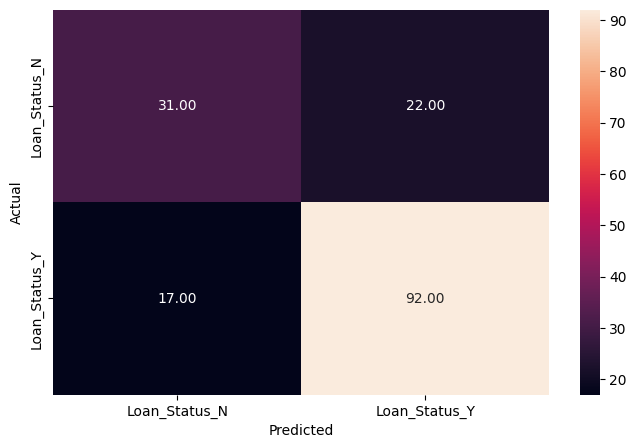

In [73]:
#checking model performace of test data
y_pred_test_dt = tree_clf.predict(X_test)
metrics_score(y_test, y_pred_test_dt)

<Axes: xlabel='Importance', ylabel='None'>

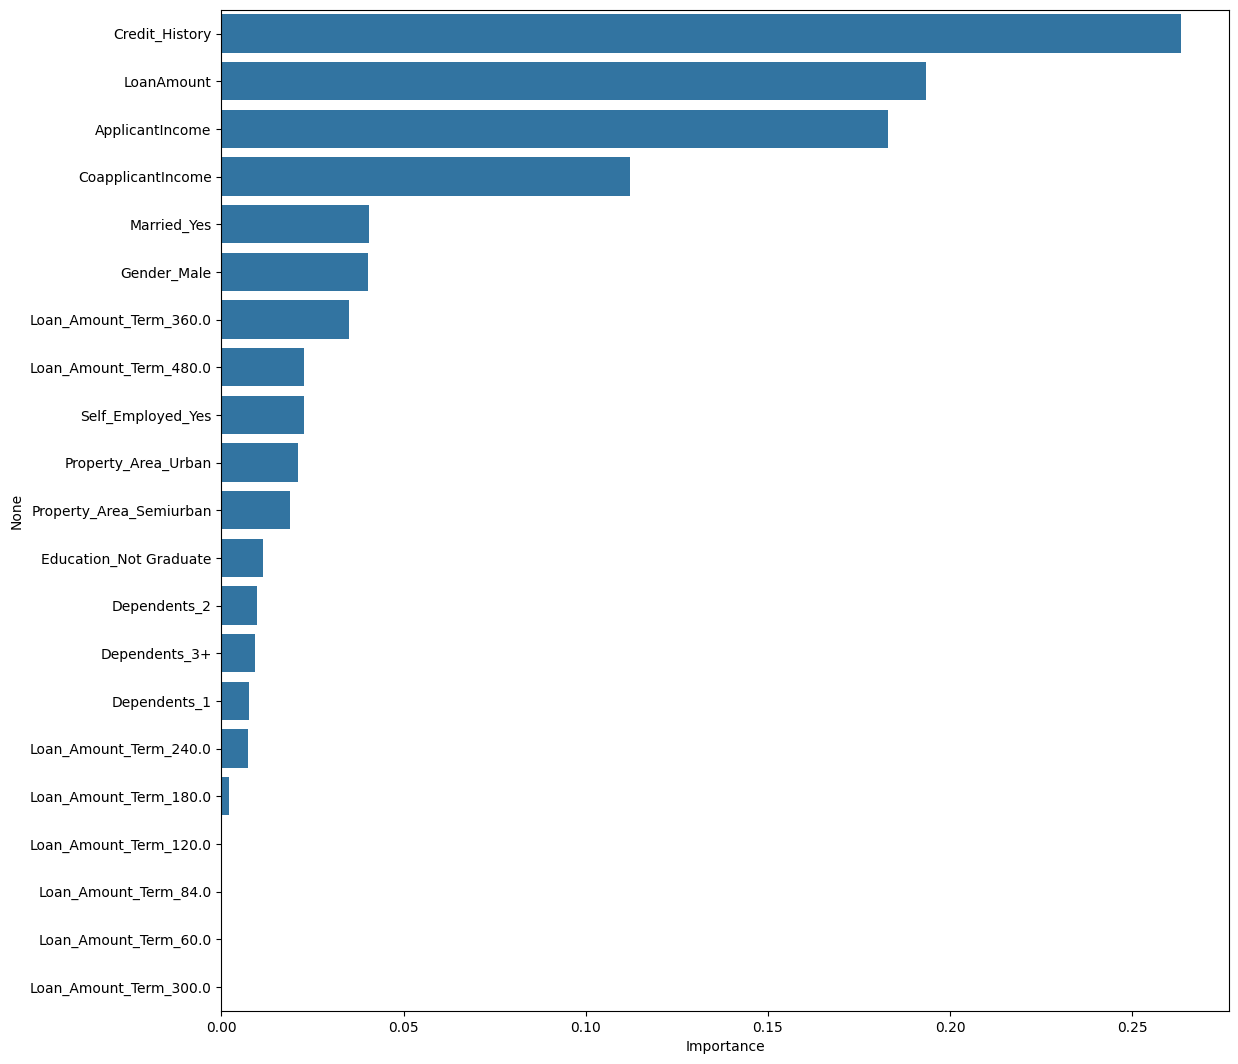

In [74]:
importances = tree_clf.feature_importances_
columns=X.columns
importance_df=pd.DataFrame(importances,index=columns,columns=['Importance']).sort_values(by='Importance',ascending=False)
plt.figure(figsize=(13,13))
sns.barplot(x=importance_df.Importance,y=importance_df.index)

### **Observations**
The above output shows the evaluation metrics for a Random forest classifier on testing data. Here are the observations we can make from the output:

The precision for class 0 is 0.55, which means that out of all instances predicted as class 0, only 55% of them are actually class 0. The recall for class 0 is 0.55, which means that out of all instances that are actually class 0, only 55% of them are correctly predicted as class 0.

The precision for class 1 is 0.80, which means that out of all instances predicted as class 1, 80% of them are actually class 1. The recall for class 1 is 0.80, which means that out of all instances that are actually class 1, 80% of them are correctly predicted as class 1.

The F1-score for class 0 is 0.55, and for class 1, it is 0.80.

The overall accuracy of the model is 0.72, which means that the model has correctly predicted 72% of instances in the test set.

The macro and weighted averages for precision, recall, and F1-score are 0.67 and 0.72, respectively. This indicates that the model performs slightly better on class 1 than on class 0, and the performance is not biased towards one class.

In summary, the model performs relatively well on the given test data, achieving an accuracy of 0.72, with precision and recall scores for class 1 being higher than those for class 0. However, the model's performance can be further improved by fine-tuning hyperparameters, feature engineering, or using a more powerful model.

### **Tuning the Random Forest**

In [75]:
rf_estimator_tuned = RandomForestClassifier(class_weight={0:0.17,1:0.83}, random_state=1)

# Grid of parameters to choose from
## add from article
params_rf = {
        "n_estimators": [100,250,500],
        "min_samples_leaf": np.arange(1, 4,1),
        "max_features": [0.7,0.9,'auto'],
}


# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label=1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, params_rf, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

              precision    recall  f1-score   support

           0       1.00      0.48      0.65       122
           1       0.80      1.00      0.89       254

    accuracy                           0.83       376
   macro avg       0.90      0.74      0.77       376
weighted avg       0.87      0.83      0.81       376



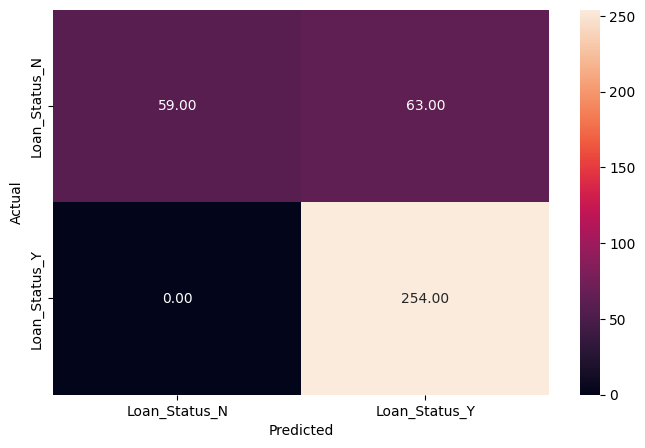

In [76]:
rf_estimator_tuned.fit(X_train, y_train)
y_pred_train_rf_tuned = rf_estimator_tuned.predict(X_train)
metrics_score(y_train, y_pred_train_rf_tuned)

### **Observations**

              precision    recall  f1-score   support

           0       1.00      0.49      0.66        53
           1       0.80      1.00      0.89       109

    accuracy                           0.83       162
   macro avg       0.90      0.75      0.77       162
weighted avg       0.87      0.83      0.81       162



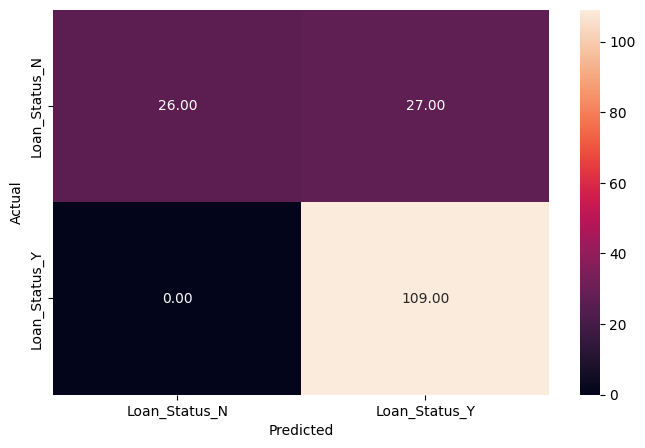

In [77]:
y_pred_test_rf_tuned = rf_estimator_tuned.predict(X_test)
metrics_score(y_test, y_pred_test_rf_tuned)

### **Observations**

<Axes: xlabel='Importance', ylabel='None'>

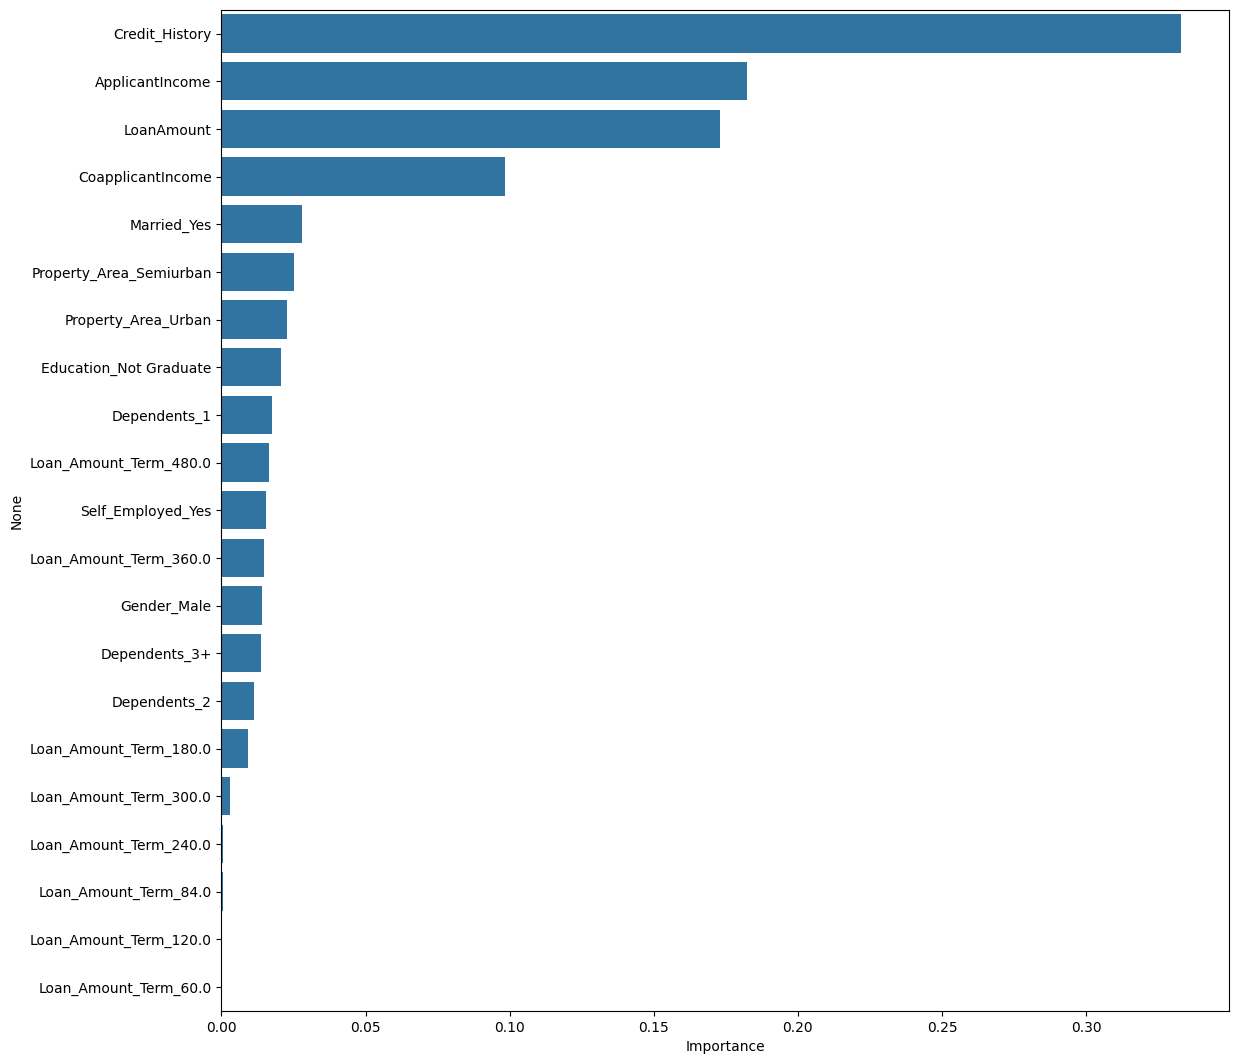

In [78]:
importances = rf_estimator_tuned.feature_importances_
columns=X.columns
importance_df=pd.DataFrame(importances,index=columns,columns=['Importance']).sort_values(by='Importance',ascending=False)
plt.figure(figsize=(13,13))
sns.barplot(x=importance_df.Importance,y=importance_df.index)

### **Observations**